In [25]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");

v1.2


In [27]:
DT, v0, DR, N, Lx, Ly, ϕa, ϕp = (1.0, 7.5, 1.0, 100, 8.0, 1.0, 0.7, 0.10000000000000002);
param = new_sim_param(DT, v0, DR, N, Lx, Ly, ϕa, ϕp; T = 1.00, name = "sim_run_1", save_interval = 0.001, save_on = true);
t_saves, η_saves = load_compress_sim(param)
t, η = t_saves[end], η_saves[end]

full load


saved


(0.07900000344562076, [0.0 1.0 … 1.0 0.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 0.0 1.0 … 1.0 1.0;;; 0.0 0.0 … -1.0 0.0; -1.0 -1.0 … 0.0 0.0; … ; 0.0 1.0 … 1.0 -1.0; 0.0 1.0 … 1.0 -1.0])

In [32]:
@unpack DT, v0, DR, N, Lx,Ly, ϕa, ϕp, T , name, N₁, N₂, save_interval, save_on = param

ϵ = 0.01
ρa, ρp, m = local_average(η, ϵ, N, N₁, N₂)

# ρa, ρp, m = local_average_1d(η, ϵ, N, N₁, N₂)


([0.2 0.4 … 0.4 0.4; 0.6 0.6 … 0.6 0.4; … ; 0.4 0.8 … 0.8 0.6; 0.4 0.6 … 1.0 0.6], [0.2 0.4 … 0.2 0.2; 0.2 0.2 … 0.4 0.4; … ; 0.2 0.2 … 0.2 0.2; 0.2 0.2 … 0.0 0.0], [-0.2 0.0 … 0.0 -0.4; -0.6 -0.2 … 0.2 0.0; … ; 0.0 0.0 … 0.0 -0.2; 0.0 0.6 … -0.2 -0.2])

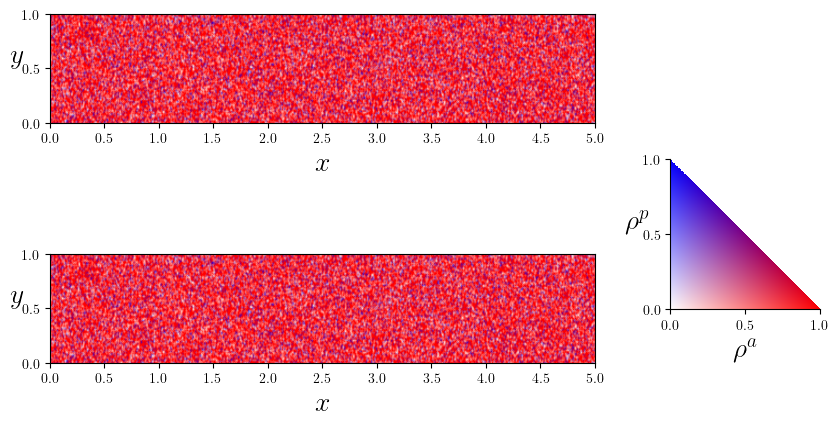

In [34]:
L = 5

rgb_image = rho_to_rgb(ρa, ρp, m; type = "rho" );

using PyPlot
PyPlot.close("all")
rc("text", usetex=true)
fig, axs = plt.subplots(2, 1, figsize=(10,5))

for ax in axs
    ax.imshow(rgb_image; extent = [0,L,0,1], interpolation = "bilinear")
    ax.get_xaxis().set_ticks(0:0.5:L)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"x", fontsize = 20)
    ax.set_ylabel(L"y",fontsize = 20, rotation = 0)
end

fig.tight_layout()

# add colour bars
fig.subplots_adjust(right=0.6)
cbar_ax = fig.add_axes([0.65, 0.3, 0.2, 0.3])

ax = cbar_ax

Δx = 0.001
cbar_ρa = [ x*(x+y≤ 1) for x in Δx:Δx:1, y in Δx:Δx:1 ] 
cbar_ρp = [ y*(x+y≤1) for x in Δx:Δx:1, y in Δx:Δx:1 ] 
cbar_m  = [ 0 for x in Δx:Δx:1, y in Δx:Δx:1 ] 

rgb_image = rho_to_rgb(cbar_ρa, cbar_ρp, cbar_m; type = "rho" );

ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = 20)
    ax.set_ylabel(L"\rho^p",fontsize = 20, rotation = 0)
display(fig)
